## Assignment 7

**Exercises 3, 8 and 9**

## 3

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function ofˆpm1. The x-axis should displayˆ
pm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.

Hint: In a setting with two classes,ˆ
pm1 = 1−
ˆ
pm2. You could make this plot by hand, but it will be much easier to make in R.

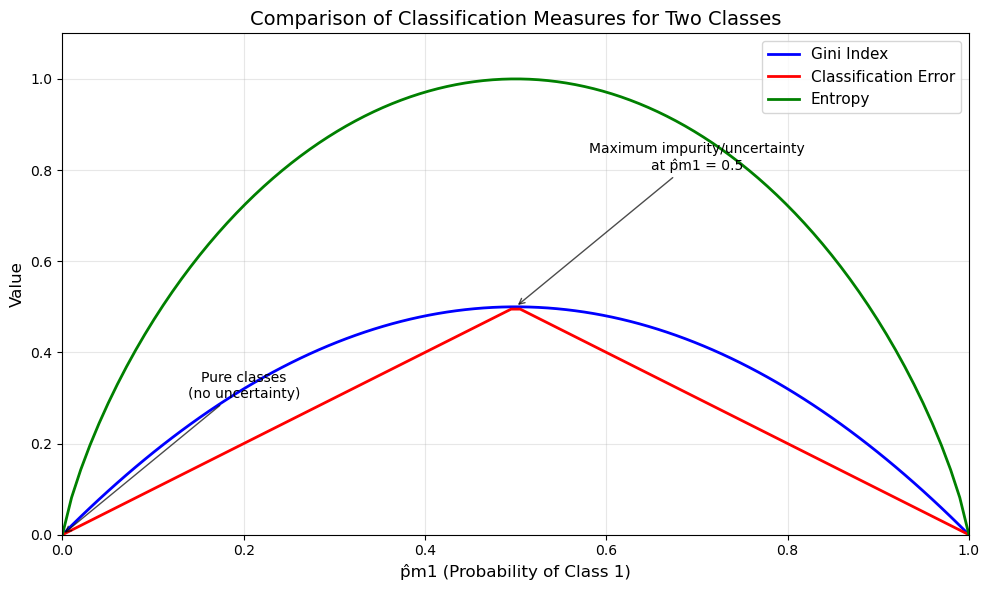

In [5]:
import numpy as np
import matplotlib.pyplot as plt


p_m1 = np.linspace(0, 1, 100)


p_m2 = 1 - p_m1


gini = 1 - (p_m1**2 + p_m2**2)


classification_error = 1 - np.maximum(p_m1, p_m2)


entropy = np.zeros_like(p_m1)
for i in range(len(p_m1)):
    if p_m1[i] > 0 and p_m2[i] > 0:
        entropy[i] = -(p_m1[i] * np.log2(p_m1[i]) + p_m2[i] * np.log2(p_m2[i]))
    else:
        entropy[i] = 0  


plt.figure(figsize=(10, 6))
plt.plot(p_m1, gini, label='Gini Index', linewidth=2, color='blue')
plt.plot(p_m1, classification_error, label='Classification Error', linewidth=2, color='red')
plt.plot(p_m1, entropy, label='Entropy', linewidth=2, color='green')


plt.xlabel('p̂m1 (Probability of Class 1)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Comparison of Classification Measures for Two Classes', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1.1)


plt.annotate('Maximum impurity/uncertainty\nat p̂m1 = 0.5', 
             xy=(0.5, 0.5), xytext=(0.7, 0.8),
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
             fontsize=10, ha='center')

plt.annotate('Pure classes\n(no uncertainty)', 
             xy=(0, 0), xytext=(0.2, 0.3),
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

## 8 (a-f)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from statsmodels.datasets import get_rdataset

carseats_data = get_rdataset("Carseats", "ISLR").data

print(carseats_data.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [28]:
#8a

print("\nCategorical variables:", carseats_data.select_dtypes(include=['object']).columns.tolist())
carseats_encoded = pd.get_dummies(carseats_data, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)
print(f"After encoding shape: {carseats_encoded.shape}")

X = carseats_encoded.drop('Sales', axis=1)
y = carseats_encoded['Sales']

print("Features in the dataset:")
print(X.columns.tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")


Categorical variables: ['ShelveLoc', 'Urban', 'US']
After encoding shape: (400, 12)
Features in the dataset:
['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']

Training set size: 280 samples
Test set size: 120 samples
Number of features: 11


Regression Tree Test MSE: 4.8583
Regression Tree Test RMSE: 2.2041


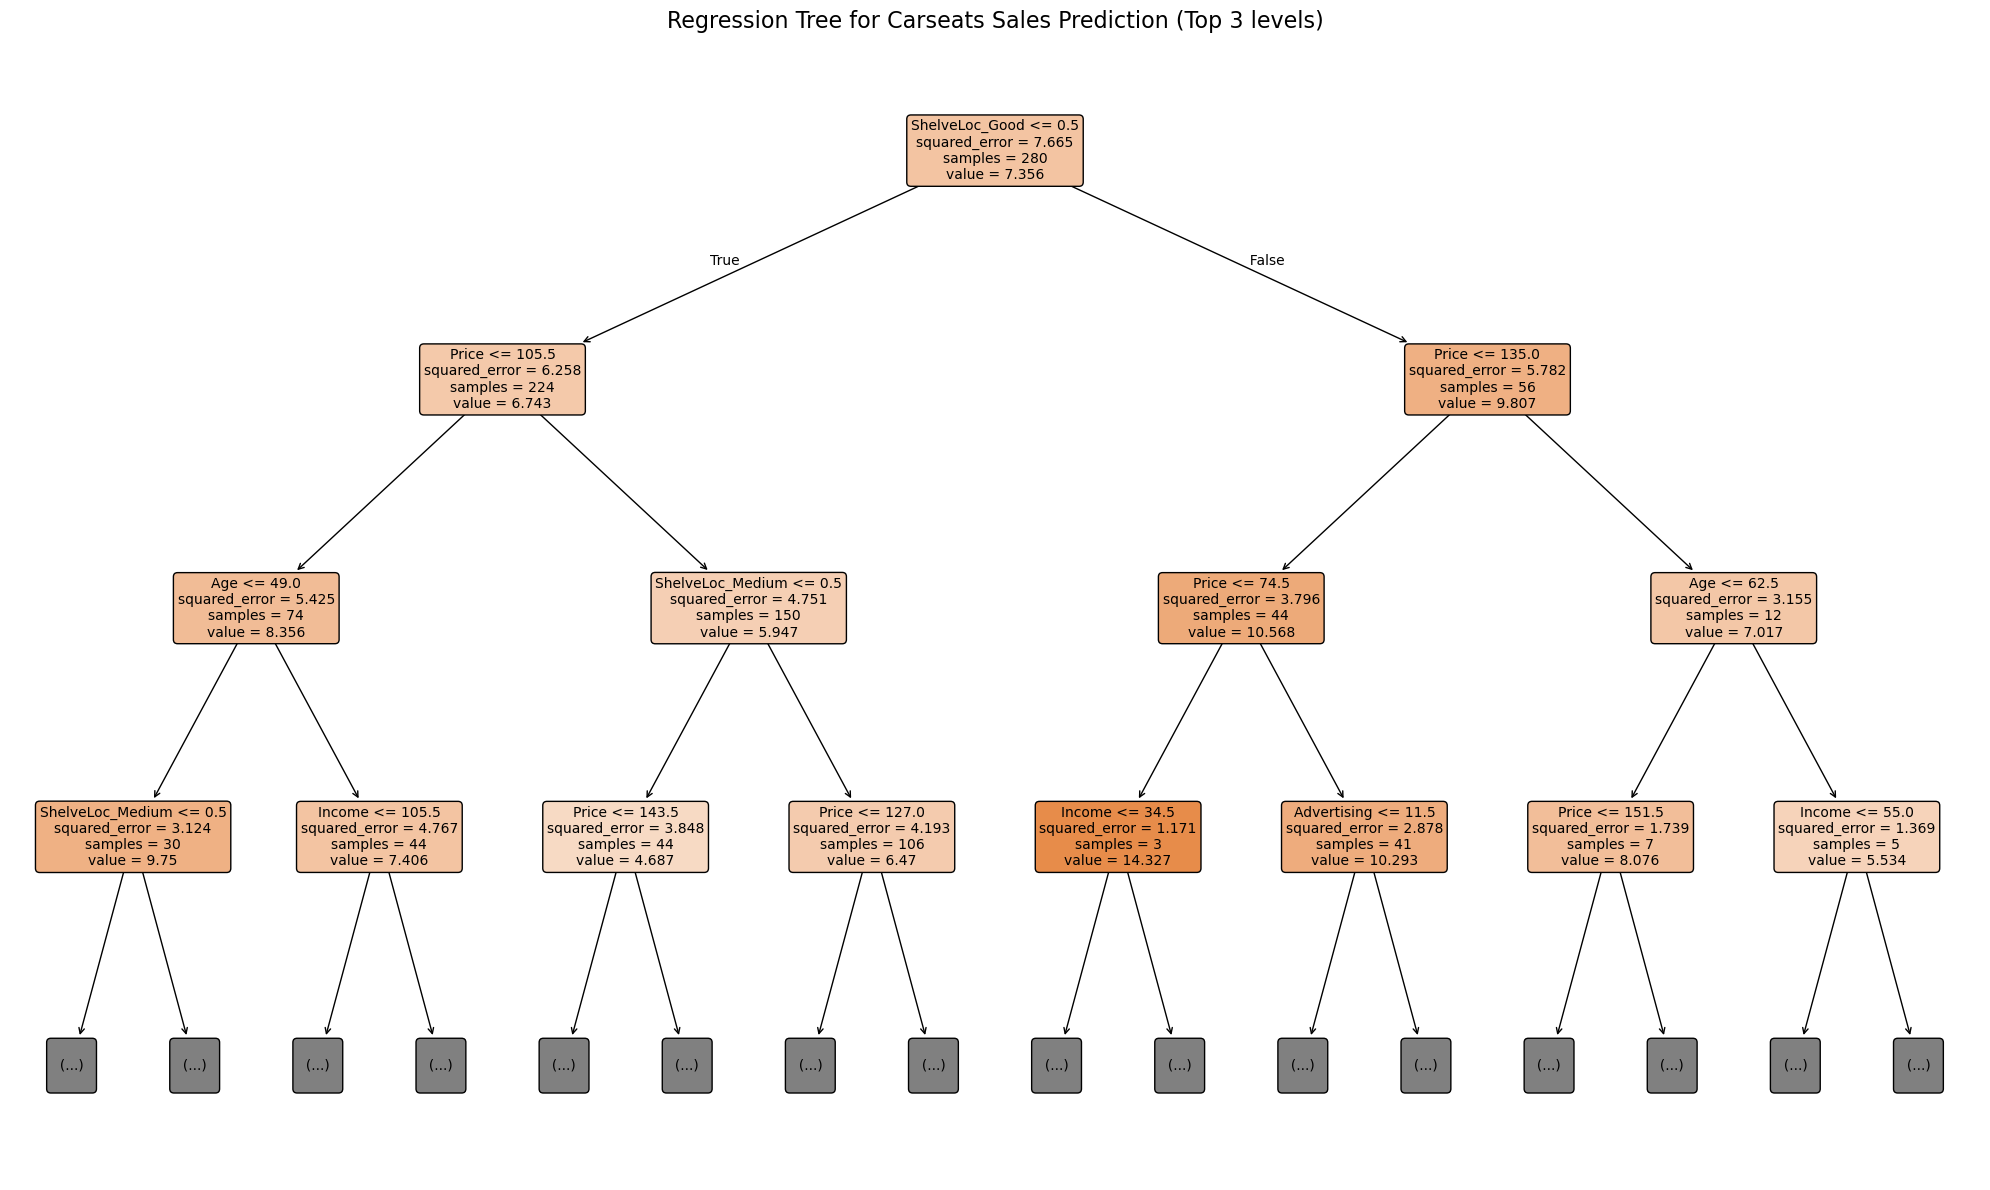


Feature Importance (Single Tree):
             Feature  Importance
4              Price    0.295262
7     ShelveLoc_Good    0.204231
5                Age    0.123214
0          CompPrice    0.101563
1             Income    0.082350
8   ShelveLoc_Medium    0.074794
2        Advertising    0.056680
6          Education    0.029743
3         Population    0.023053
10            US_Yes    0.005577
9          Urban_Yes    0.003534


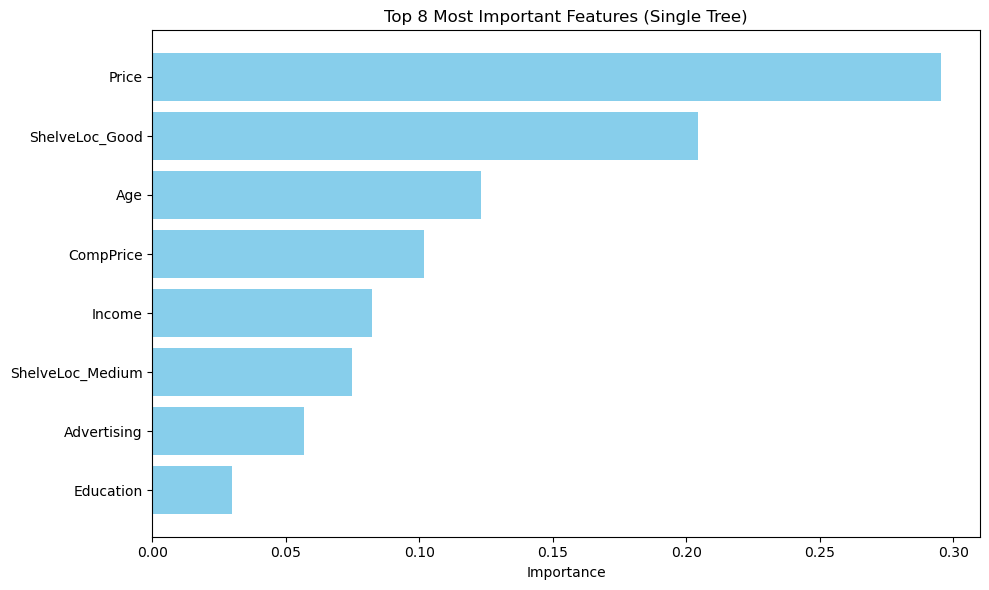

In [34]:
#8b

tree_model = DecisionTreeRegressor(random_state=42, max_depth=8)
tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

print(f"Regression Tree Test MSE: {mse_tree:.4f}")
print(f"Regression Tree Test RMSE: {np.sqrt(mse_tree):.4f}")


plt.figure(figsize=(20, 12))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, 
          fontsize=10, max_depth=3)
plt.title("Regression Tree for Carseats Sales Prediction (Top 3 levels)", fontsize=16)
plt.tight_layout()
plt.show()


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Single Tree):")
print(feature_importance)


plt.figure(figsize=(10, 6))
top_features = feature_importance.head(8)
plt.barh(range(len(top_features)), top_features['Importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 8 Most Important Features (Single Tree)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Testing different tree depths...
Optimal tree depth: 5
CV MSE at optimal depth: 5.2099


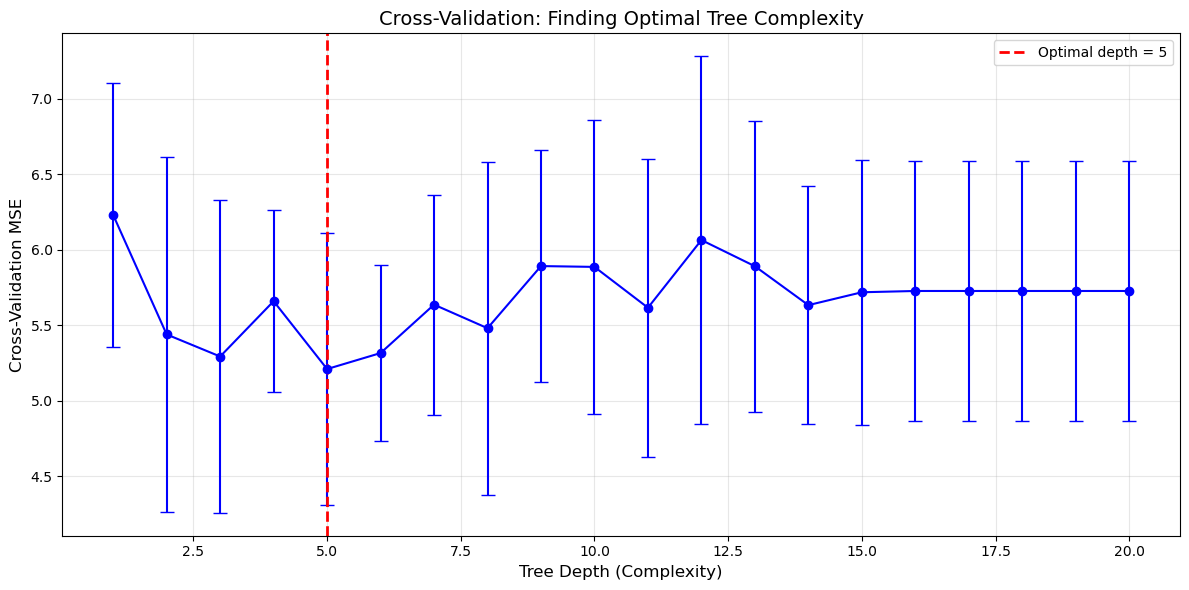


Comparison:
Original Tree (depth=8) Test MSE: 4.8583
Pruned Tree (depth=5) Test MSE: 5.2286
Improvement from pruning: No


In [36]:
#8c



max_depths = range(1, 21)
cv_scores_mean = []
cv_scores_std = []

print("Testing different tree depths...")
for depth in max_depths:
    tree_cv = DecisionTreeRegressor(max_depth=depth, random_state=42)
    cv_scores = cross_val_score(tree_cv, X_train, y_train, cv=5, 
                               scoring='neg_mean_squared_error')
    cv_scores_mean.append(-cv_scores.mean())  # Convert back to positive MSE
    cv_scores_std.append(cv_scores.std())

optimal_depth = max_depths[np.argmin(cv_scores_mean)]
print(f"Optimal tree depth: {optimal_depth}")
print(f"CV MSE at optimal depth: {min(cv_scores_mean):.4f}")

plt.figure(figsize=(12, 6))
plt.errorbar(max_depths, cv_scores_mean, yerr=cv_scores_std, marker='o', capsize=5, color='blue')
plt.axvline(x=optimal_depth, color='red', linestyle='--', linewidth=2, 
            label=f'Optimal depth = {optimal_depth}')
plt.xlabel('Tree Depth (Complexity)', fontsize=12)
plt.ylabel('Cross-Validation MSE', fontsize=12)
plt.title('Cross-Validation: Finding Optimal Tree Complexity', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

pruned_tree = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
pruned_tree.fit(X_train, y_train)
y_pred_pruned = pruned_tree.predict(X_test)
mse_pruned = mean_squared_error(y_test, y_pred_pruned)

print(f"\nComparison:")
print(f"Original Tree (depth=8) Test MSE: {mse_tree:.4f}")
print(f"Pruned Tree (depth={optimal_depth}) Test MSE: {mse_pruned:.4f}")
print(f"Improvement from pruning: {'Yes' if mse_pruned < mse_tree else 'No'}")
if mse_pruned < mse_tree:
    print(f"MSE reduced by: {((mse_tree - mse_pruned) / mse_tree * 100):.2f}%")

Training bagging model with 100 trees...
Bagging Test MSE: 2.5330
Bagging Test RMSE: 1.5915
Calculating feature importance for bagging...

Top 8 Most Important Features (Bagging):
            Feature  Importance
4             Price    0.310458
7    ShelveLoc_Good    0.182967
5               Age    0.115923
0         CompPrice    0.113382
2       Advertising    0.072422
1            Income    0.058456
8  ShelveLoc_Medium    0.056450
3        Population    0.041910


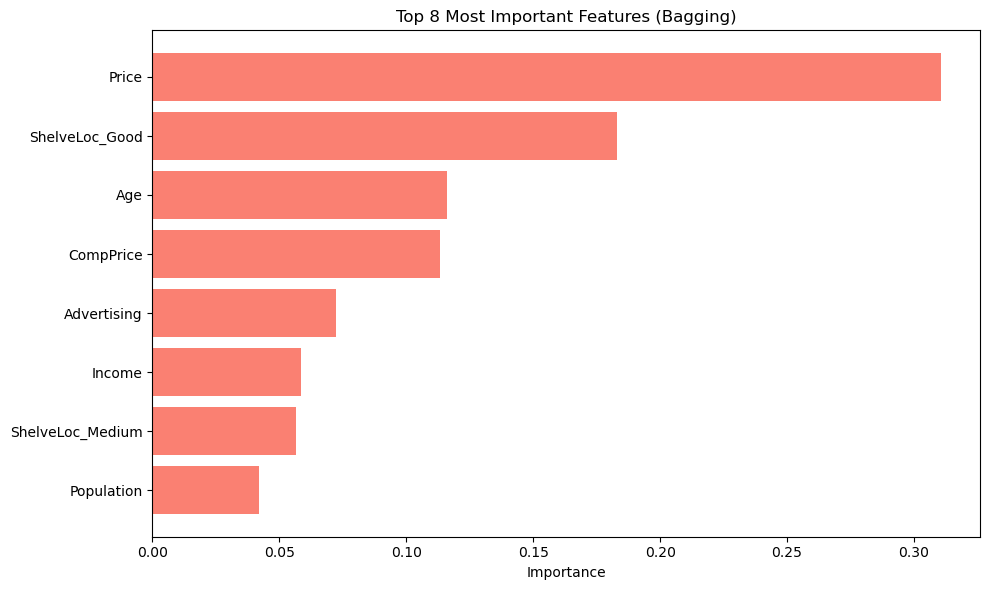

In [50]:
#8d

print("Training bagging model with 100 trees...")

bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),  
    n_estimators=100, 
    random_state=42,
    n_jobs=-1  
)

bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)

print(f"Bagging Test MSE: {mse_bagging:.4f}")
print(f"Bagging Test RMSE: {np.sqrt(mse_bagging):.4f}")

print("Calculating feature importance for bagging...")
importances_list = []
for i in range(min(10, len(bagging_model.estimators_))):  # Use first 10 trees
    importances_list.append(bagging_model.estimators_[i].feature_importances_)

avg_importance = np.mean(importances_list, axis=0)
bagging_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': avg_importance
}).sort_values('Importance', ascending=False)

print("\nTop 8 Most Important Features (Bagging):")
print(bagging_importance.head(8))

plt.figure(figsize=(10, 6))
top_bagging_features = bagging_importance.head(8)
plt.barh(range(len(top_bagging_features)), top_bagging_features['Importance'], color='salmon')
plt.yticks(range(len(top_bagging_features)), top_bagging_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 8 Most Important Features (Bagging)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Training Random Forest with 100 trees...
Random Forest Test MSE: 2.5506
Random Forest Test RMSE: 1.5971

Top 8 Most Important Features (Random Forest):
            Feature  Importance
4             Price    0.314535
7    ShelveLoc_Good    0.194941
5               Age    0.127176
0         CompPrice    0.105038
2       Advertising    0.072838
1            Income    0.052845
8  ShelveLoc_Medium    0.049128
3        Population    0.039683


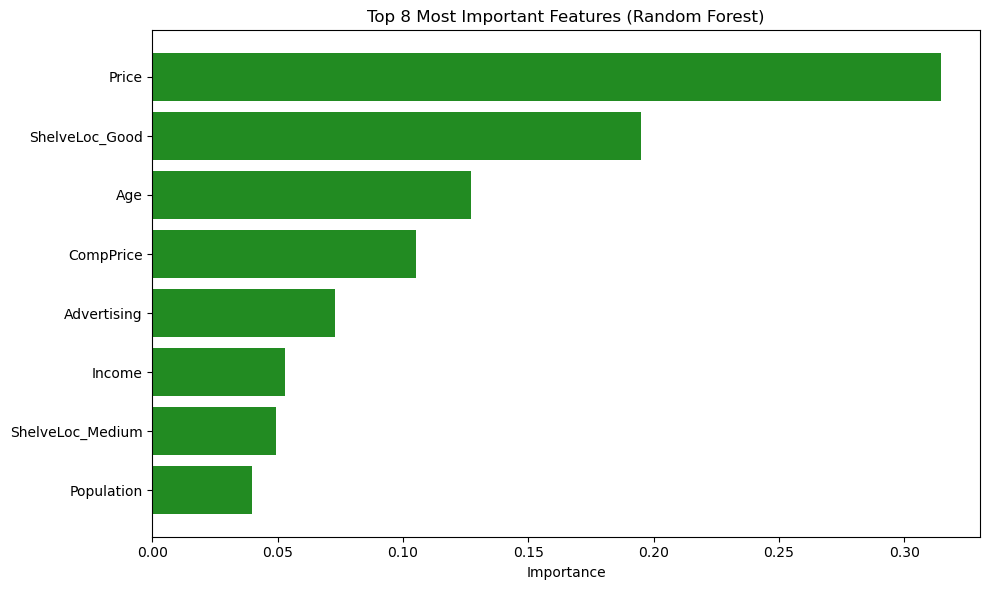


Testing different values of m (max_features):
Total features available: 11
m = 1: Test MSE = 4.3972
m = 2: Test MSE = 3.5478
m = 3: Test MSE = 2.9870
m = 4: Test MSE = 2.8986
m = sqrt(11) ≈ 3: Test MSE = 2.9870
m = log2(11) ≈ 3: Test MSE = 2.9870
m = all: Test MSE = 2.5506


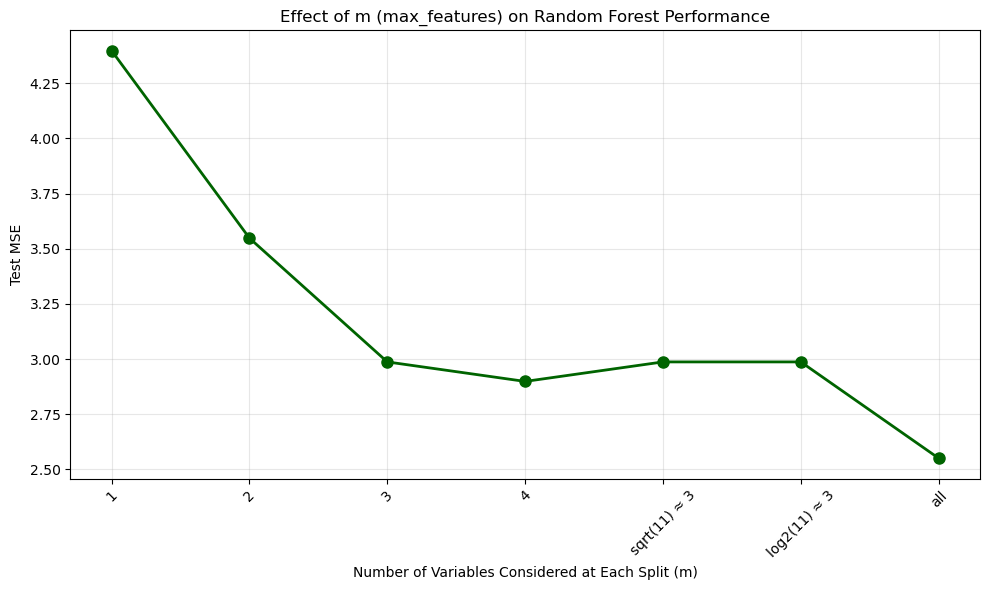

In [42]:
#8e



print("Training Random Forest with 100 trees...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Test MSE: {mse_rf:.4f}")
print(f"Random Forest Test RMSE: {np.sqrt(mse_rf):.4f}")


rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 8 Most Important Features (Random Forest):")
print(rf_importance.head(8))

plt.figure(figsize=(10, 6))
top_rf_features = rf_importance.head(8)
plt.barh(range(len(top_rf_features)), top_rf_features['Importance'], color='forestgreen')
plt.yticks(range(len(top_rf_features)), top_rf_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 8 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


print(f"\nTesting different values of m (max_features):")
print(f"Total features available: {X.shape[1]}")

m_values = [1, 2, 3, 4, 'sqrt', 'log2', None]  # None means use all features
m_results = []

for m in m_values:
    if m is None:
        m_display = 'all'
        max_feat = None
    elif isinstance(m, str):
        max_feat = m
        m_display = m
        if m == 'sqrt':
            m_display = f"sqrt({X.shape[1]}) ≈ {int(np.sqrt(X.shape[1]))}"
        elif m == 'log2':
            m_display = f"log2({X.shape[1]}) ≈ {int(np.log2(X.shape[1]))}"
    else:
        max_feat = m
        m_display = str(m)
    
    rf_m = RandomForestRegressor(n_estimators=100, max_features=max_feat, 
                                random_state=42, n_jobs=-1)
    rf_m.fit(X_train, y_train)
    y_pred_m = rf_m.predict(X_test)
    mse_m = mean_squared_error(y_test, y_pred_m)
    m_results.append((m_display, mse_m))
    print(f"m = {m_display}: Test MSE = {mse_m:.4f}")


plt.figure(figsize=(10, 6))
m_labels, m_mses = zip(*m_results)
plt.plot(range(len(m_labels)), m_mses, 'o-', color='darkgreen', linewidth=2, markersize=8)
plt.xticks(range(len(m_labels)), m_labels, rotation=45)
plt.xlabel('Number of Variables Considered at Each Split (m)')
plt.ylabel('Test MSE')
plt.title('Effect of m (max_features) on Random Forest Performance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


All variables found! Running summary...
Results Summary:
                     Method  Test MSE  Test RMSE
0     Single Tree (depth=8)    4.8583     2.2041
1  Pruned Tree (CV optimal)    5.2286     2.2866
2                   Bagging    2.5330     1.5915
3             Random Forest    2.5506     1.5971

Percentage improvement over single tree:
                     Method  Improvement (%)
0     Single Tree (depth=8)             0.00
1  Pruned Tree (CV optimal)            -7.62
2                   Bagging            47.86
3             Random Forest            47.50


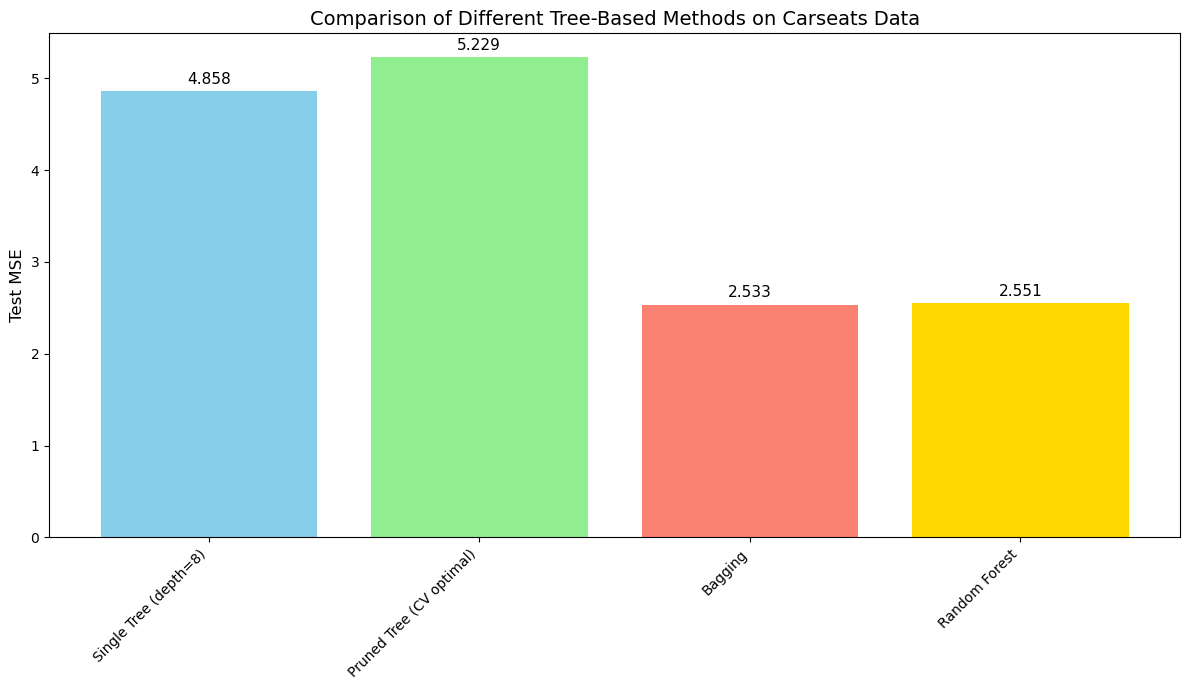


🏆 Best performing method: Bagging
📊 Lowest Test MSE: 2.5330
📈 RMSE: 1.5915


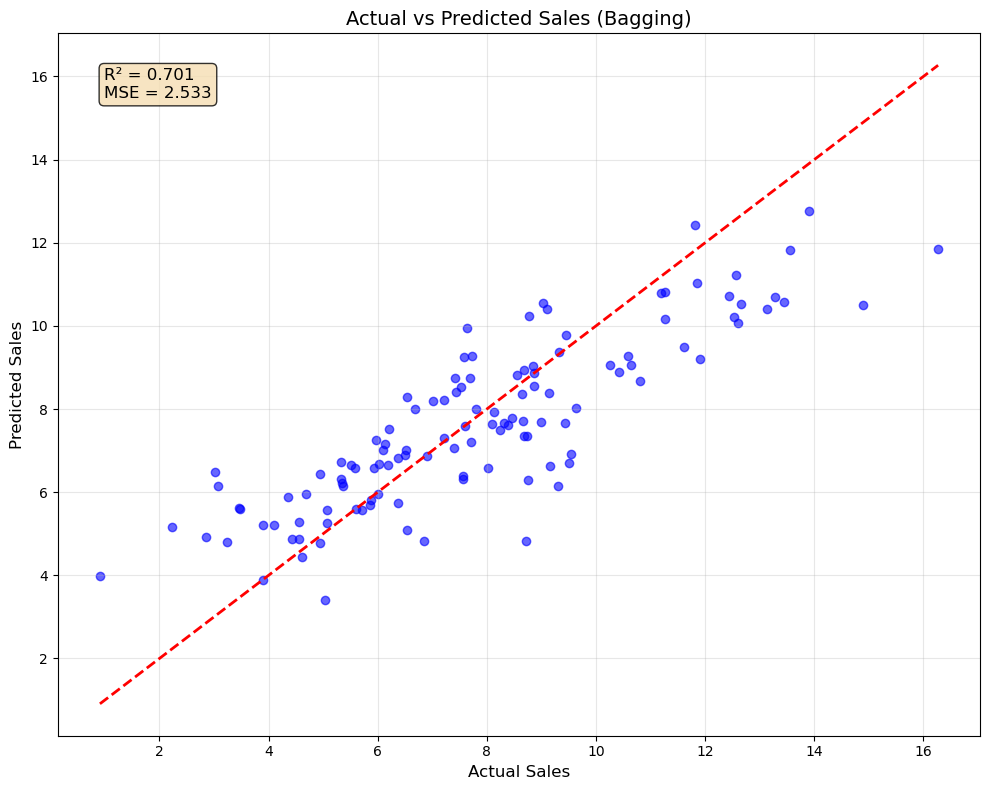


📈 Model Performance Summary:
R² Score: 0.7013
Mean Absolute Error: 1.2646
Max Error: 4.4144


In [54]:
#10f

required_vars = ['mse_tree', 'mse_pruned', 'mse_bagging', 'mse_rf']
missing_vars = []

for var in required_vars:
    if var not in globals():
        missing_vars.append(var)

if missing_vars:
    print(f"Missing variables: {missing_vars}")
    print("You need to run the previous sections first!")
    print("\nRun these sections in order:")
    print("1. Section (b) - Single Tree")
    print("2. Section (c) - Cross-validation and Pruned Tree") 
    print("3. Section (d) - Bagging (with the fixed code)")
    print("4. Section (e) - Random Forest")
    print("5. Then run this summary section")
else:
    print("All variables found! Running summary...")
    
    results_summary = pd.DataFrame({
        'Method': ['Single Tree (depth=8)', 'Pruned Tree (CV optimal)', 'Bagging', 'Random Forest'],
        'Test MSE': [mse_tree, mse_pruned, mse_bagging, mse_rf],
        'Test RMSE': [np.sqrt(mse_tree), np.sqrt(mse_pruned), 
                      np.sqrt(mse_bagging), np.sqrt(mse_rf)]
    })
    
    print("Results Summary:")
    print("="*50)
    print(results_summary.round(4))
    
    
    base_mse = mse_tree
    for i, mse in enumerate([mse_tree, mse_pruned, mse_bagging, mse_rf]):
        improvement = ((base_mse - mse) / base_mse) * 100
        results_summary.loc[i, 'Improvement (%)'] = improvement
    
    print(f"\nPercentage improvement over single tree:")
    print(results_summary[['Method', 'Improvement (%)']].round(2))
    
   
    plt.figure(figsize=(12, 7))
    methods = results_summary['Method']
    mse_values = results_summary['Test MSE']
    
    bars = plt.bar(methods, mse_values, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
    plt.ylabel('Test MSE', fontsize=12)
    plt.title('Comparison of Different Tree-Based Methods on Carseats Data', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
   
    for bar, mse in zip(bars, mse_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                 f'{mse:.3f}', ha='center', va='bottom', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    best_method_idx = results_summary['Test MSE'].idxmin()
    best_method = results_summary.loc[best_method_idx, 'Method']
    best_mse = results_summary.loc[best_method_idx, 'Test MSE']
    
    print(f"\n🏆 Best performing method: {best_method}")
    print(f"📊 Lowest Test MSE: {best_mse:.4f}")
    print(f"📈 RMSE: {np.sqrt(best_mse):.4f}")
    
    
    if best_method_idx == 3:  
        best_predictions = y_pred_rf
        model_name = "Random Forest"
    elif best_method_idx == 2: 
        best_predictions = y_pred_bagging
        model_name = "Bagging"
    elif best_method_idx == 1: 
        best_predictions = y_pred_pruned
        model_name = "Pruned Tree"
    else:  # Single Tree
        best_predictions = y_pred_tree
        model_name = "Single Tree"
    
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, best_predictions, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('Actual Sales', fontsize=12)
    plt.ylabel('Predicted Sales', fontsize=12)
    plt.title(f'Actual vs Predicted Sales ({model_name})', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Calculate R²
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, best_predictions)
    plt.text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {best_mse:.3f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 Model Performance Summary:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error: {np.mean(np.abs(y_test - best_predictions)):.4f}")
    print(f"Max Error: {np.max(np.abs(y_test - best_predictions)):.4f}")

## 9 (a-k)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from statsmodels.datasets import get_rdataset


print("Loading OJ (Orange Juice) dataset...")
oj_data = get_rdataset("OJ", "ISLR").data
print("Dataset loaded successfully!")

Loading OJ (Orange Juice) dataset...
Dataset loaded successfully!


In [61]:
#Dataset overview

print(f"Dataset shape: {oj_data.shape}")
print(f"Target variable: Purchase (CH = Citrus Hill, MM = Minute Maid)")
print("\nFirst few rows:")
print(oj_data.head())

print("\nDataset Info:")
print(oj_data.info())

print("\nTarget variable distribution:")
print(oj_data['Purchase'].value_counts())
print(f"Percentage: \n{oj_data['Purchase'].value_counts(normalize=True) * 100}")

print(f"\nMissing values: {oj_data.isnull().sum().sum()}")

Dataset shape: (1070, 18)
Target variable: Purchase (CH = Citrus Hill, MM = Minute Maid)

First few rows:
  Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69    

Categorical columns found: ['Store7']
Converting categorical variables to dummy variables...
After encoding: 17 features
Total observations: 1070
Features: ['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE', 'Store7_Yes']

Training set size: 800 observations
Test set size: 270 observations
Number of features: 17

Training set Purchase distribution:
Purchase
CH    488
MM    312
Name: count, dtype: int64
Test set Purchase distribution:
Purchase
CH    165
MM    105
Name: count, dtype: int64

(b) FITTING CLASSIFICATION TREE
Training Accuracy: 0.9875
Training Error Rate: 0.0125 (1.25%)

(c) PLOTTING THE TREE
Number of terminal nodes (leaves): 172
Tree depth: 20


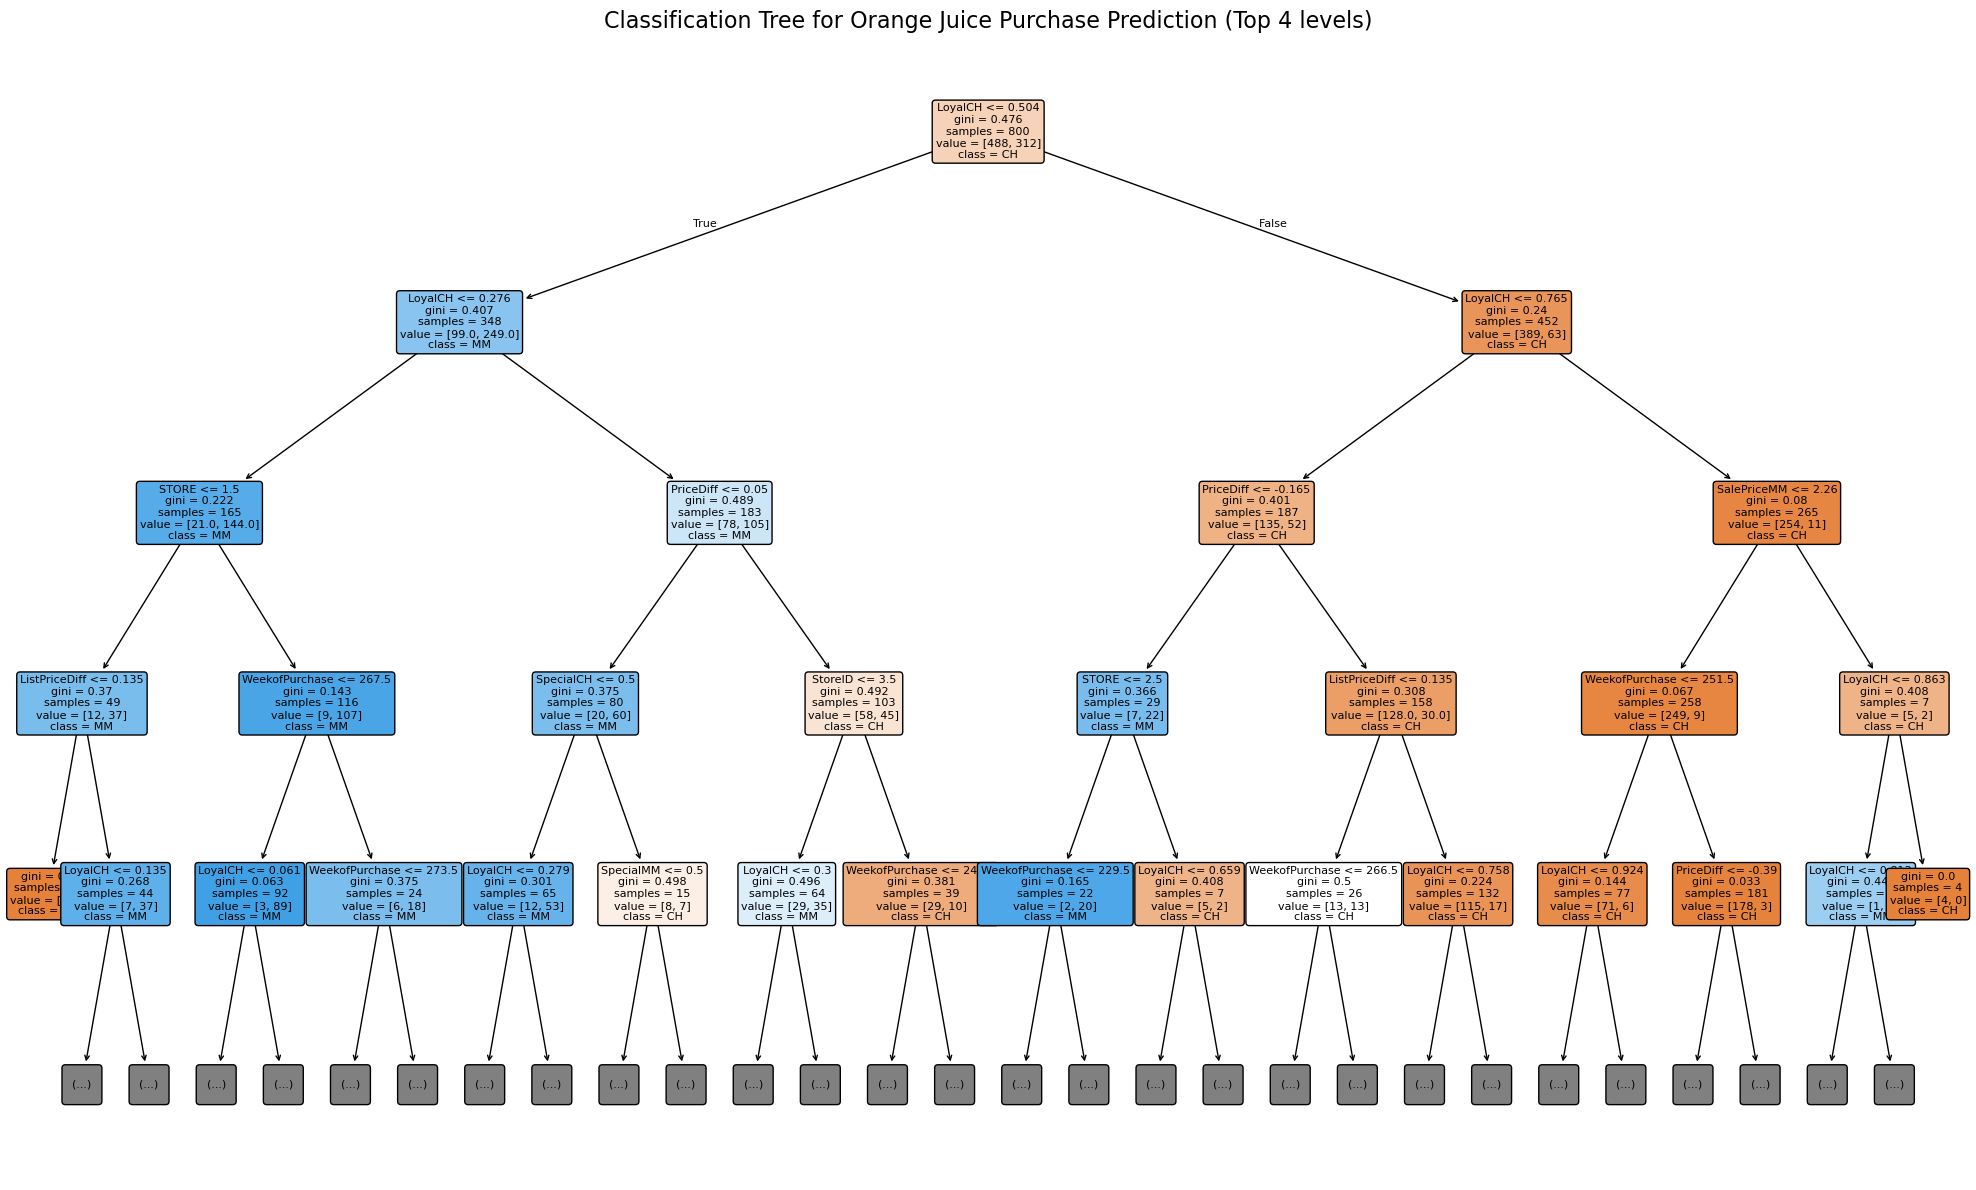


Tree Interpretation:
- The tree has 172 terminal nodes
- Tree depth is 20
- Each internal node shows a decision rule
- Each leaf shows the predicted class and class distribution

(d) TEXT SUMMARY OF THE TREE
Tree structure (first 2000 characters):
|--- LoyalCH <= 0.50
|   |--- LoyalCH <= 0.28
|   |   |--- STORE <= 1.50
|   |   |   |--- ListPriceDiff <= 0.13
|   |   |   |   |--- class: CH
|   |   |   |--- ListPriceDiff >  0.13
|   |   |   |   |--- LoyalCH <= 0.13
|   |   |   |   |   |--- class: MM
|   |   |   |   |--- LoyalCH >  0.13
|   |   |   |   |   |--- PriceDiff <= 0.23
|   |   |   |   |   |   |--- WeekofPurchase <= 233.50
|   |   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |   |--- WeekofPurchase >  233.50
|   |   |   |   |   |   |   |--- LoyalCH <= 0.20
|   |   |   |   |   |   |   |   |--- PriceDiff <= -0.09
|   |   |   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |   |   |--- PriceDiff >  -0.09
|   |   |   |   |   |   |   |   |   |--- class: CH
|  

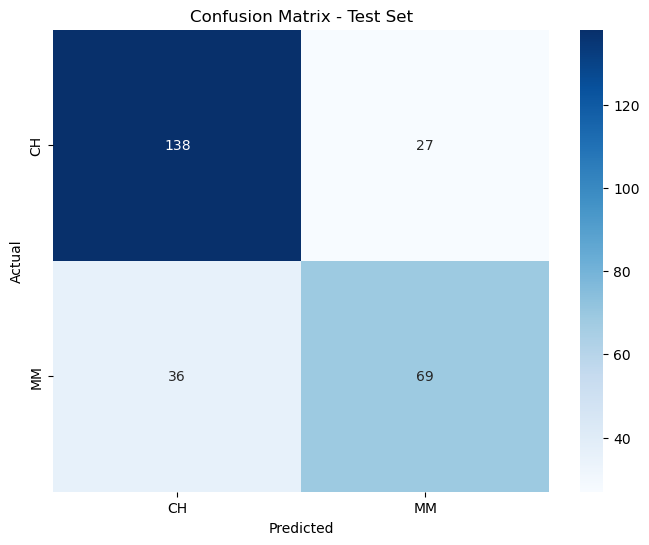


Detailed Classification Report:
              precision    recall  f1-score   support

          CH       0.79      0.84      0.81       165
          MM       0.72      0.66      0.69       105

    accuracy                           0.77       270
   macro avg       0.76      0.75      0.75       270
weighted avg       0.76      0.77      0.76       270


(f) CROSS-VALIDATION FOR OPTIMAL TREE SIZE
Testing different tree sizes...

(g) PLOTTING TREE SIZE VS CV ERROR


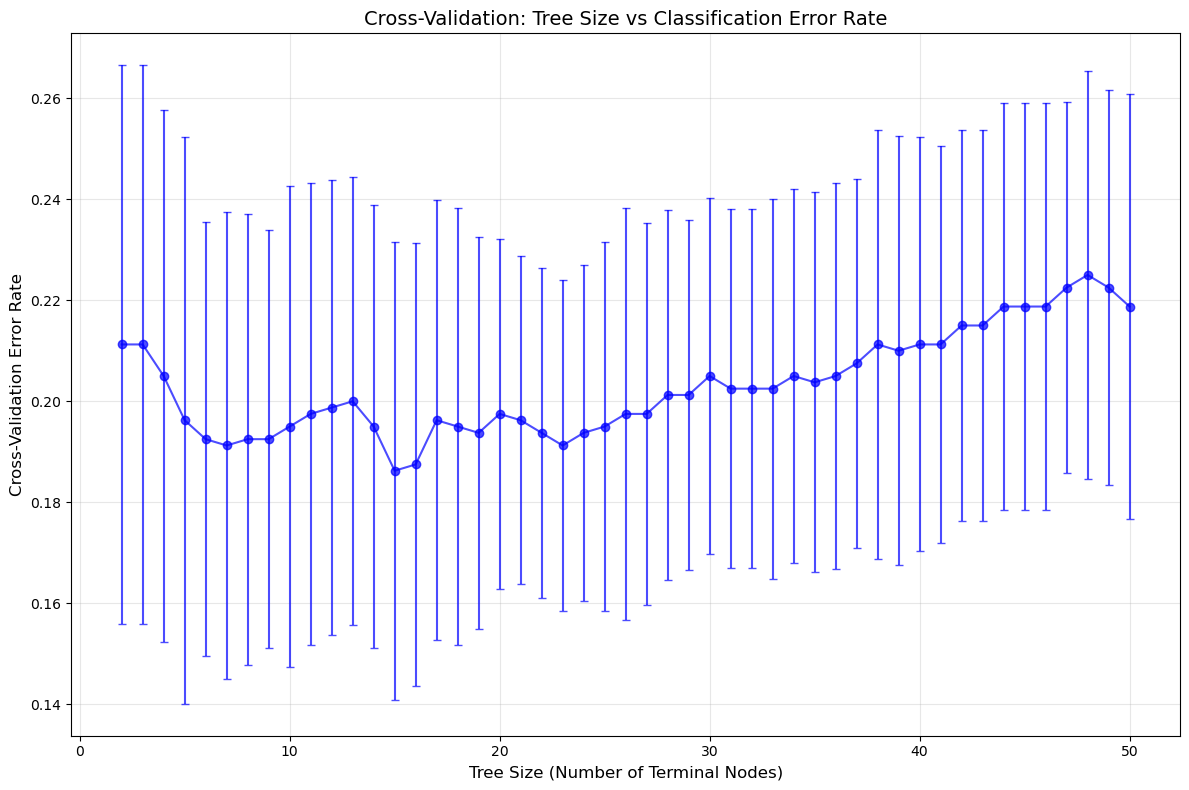


(h) OPTIMAL TREE SIZE
Optimal tree size: 15 terminal nodes
Minimum CV error rate: 0.1863 (18.63%)


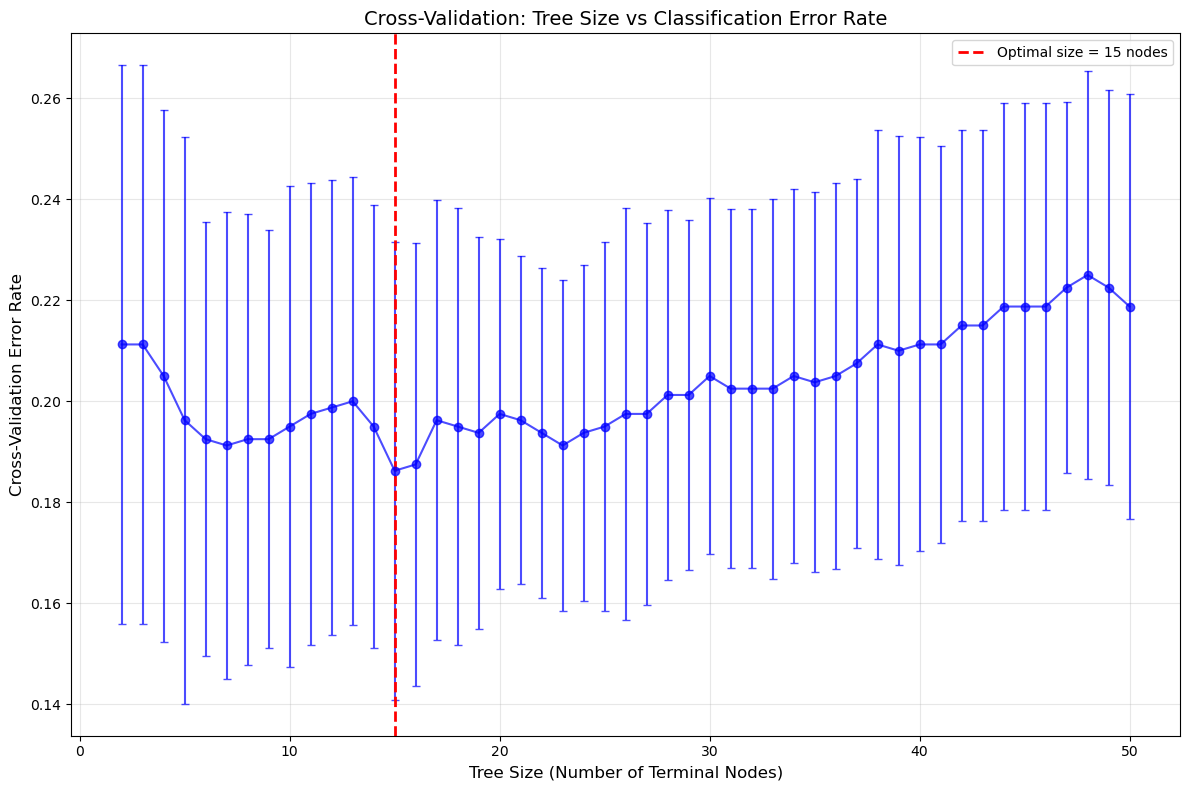


(i) CREATING PRUNED TREE
Creating pruned tree with 15 terminal nodes
Pruned tree has 15 terminal nodes
Pruned tree depth: 7


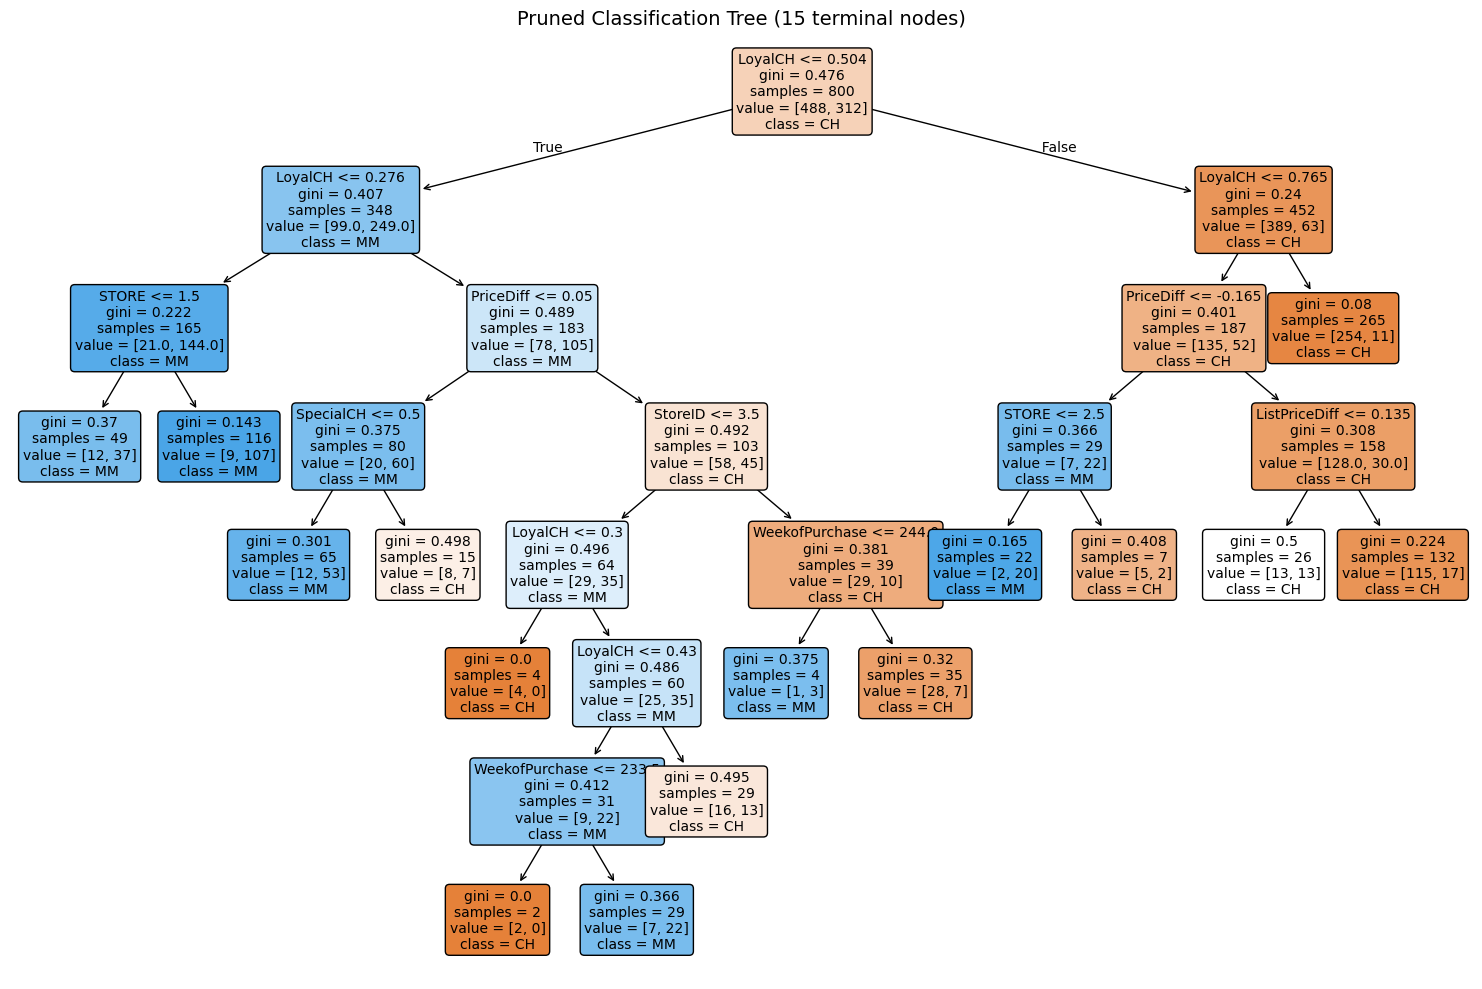


(j) COMPARING TRAINING ERROR RATES
Original Tree (unpruned):
  - Terminal nodes: 50
  - Training error rate: 0.0125 (1.25%)

Pruned Tree:
  - Terminal nodes: 15
  - Training error rate: 0.1412 (14.12%)

📊 The PRUNED tree has HIGHER training error rate
   Difference: 12.88 percentage points

(k) COMPARING TEST ERROR RATES
Original Tree (unpruned):
  - Test error rate: 0.2333 (23.33%)

Pruned Tree:
  - Test error rate: 0.1519 (15.19%)

📊 The UNPRUNED tree has HIGHER test error rate
   Difference: 8.15 percentage points

FINAL SUMMARY
           Model  Terminal Nodes  Training Error (%)  Test Error (%)
0  Unpruned Tree              50                1.25           23.33
1    Pruned Tree              15               14.12           15.19


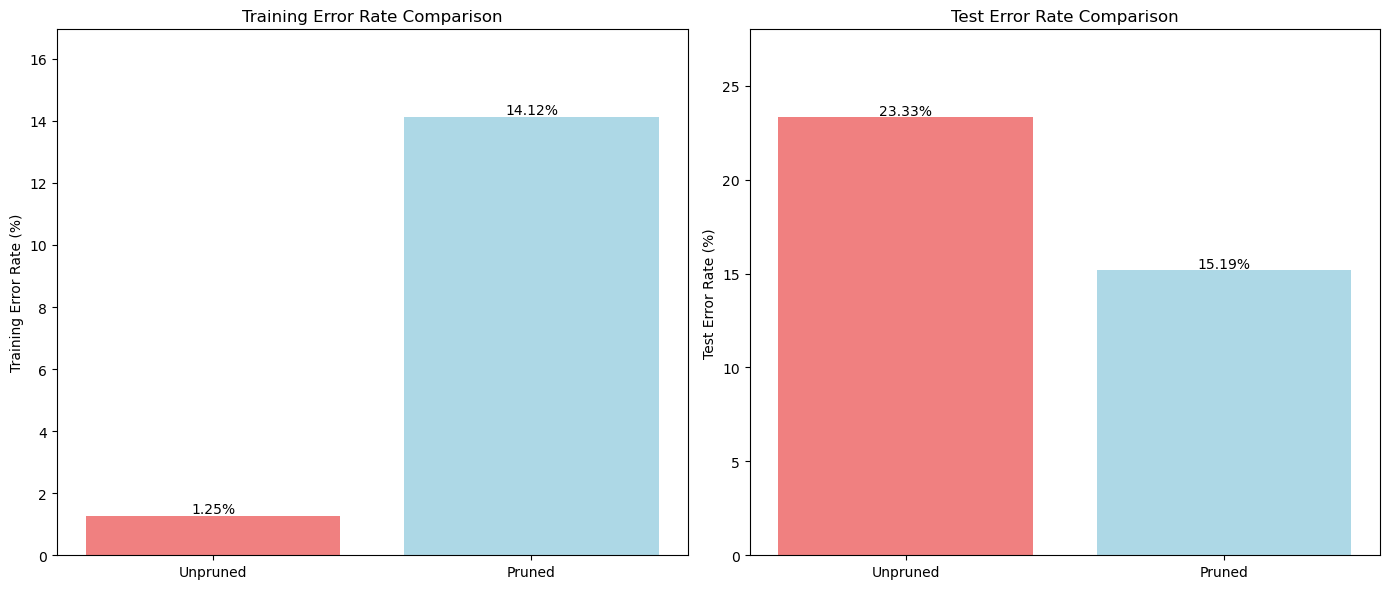


🎯 Key Insights:
   • Original tree has 50 terminal nodes, pruned has 15
   • Pruning typically increases training error (less overfitting)
   • Pruning may improve test error (better generalization)
   • The optimal tree size from CV was 15 nodes


In [87]:
#9a

X = oj_data.drop('Purchase', axis=1)
y = oj_data['Purchase']


categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns found: {categorical_cols}")


if categorical_cols:
    print(f"Converting categorical variables to dummy variables...")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print(f"After encoding: {X.shape[1]} features")
else:
    print("No categorical variables found to encode.")

print(f"Total observations: {len(oj_data)}")
print(f"Features: {list(X.columns)}")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=800, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)} observations")
print(f"Test set size: {len(X_test)} observations")
print(f"Number of features: {X_train.shape[1]}")

print(f"\nTraining set Purchase distribution:")
print(y_train.value_counts())
print(f"Test set Purchase distribution:")
print(y_test.value_counts())

#9b

print("\n" + "="*60)
print("(b) FITTING CLASSIFICATION TREE")
print("="*60)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error_rate = 1 - train_accuracy

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Error Rate: {train_error_rate:.4f} ({train_error_rate*100:.2f}%)")

#9c
print("\n" + "="*60)
print("(c) PLOTTING THE TREE")
print("="*60)

n_leaves = tree_model.get_n_leaves()
tree_depth = tree_model.get_depth()

print(f"Number of terminal nodes (leaves): {n_leaves}")
print(f"Tree depth: {tree_depth}")

plt.figure(figsize=(20, 12))
plot_tree(tree_model, 
          feature_names=X.columns, 
          class_names=['CH', 'MM'],
          filled=True, 
          rounded=True, 
          fontsize=8,
          max_depth=4)  
plt.title("Classification Tree for Orange Juice Purchase Prediction (Top 4 levels)", fontsize=16)
plt.tight_layout()
plt.show()

print(f"\nTree Interpretation:")
print(f"- The tree has {n_leaves} terminal nodes")
print(f"- Tree depth is {tree_depth}")
print(f"- Each internal node shows a decision rule")
print(f"- Each leaf shows the predicted class and class distribution")

#9d
print("\n" + "="*60)
print("(d) TEXT SUMMARY OF THE TREE")
print("="*60)

tree_text = export_text(tree_model, feature_names=list(X.columns))
print("Tree structure (first 2000 characters):")
print("="*50)
print(tree_text[:2000])
print("... (truncated for readability)")

print(f"\nExample Terminal Node Interpretation:")
print(f"Look for lines in the tree that don't have '|---' after them.")
print(f"These are terminal nodes that show:")
print(f"- The final prediction (class)")
print(f"- Number of samples reaching this node")
print(f"- Class distribution at this node")

#9e

print("\n" + "="*60)
print("(e) TEST PREDICTIONS AND CONFUSION MATRIX")
print("="*60)


y_test_pred = tree_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_error_rate = 1 - test_accuracy

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Error Rate: {test_error_rate:.4f} ({test_error_rate*100:.2f}%)")

cm = confusion_matrix(y_test, y_test_pred)
print(f"\nConfusion Matrix:")
print("="*30)
print(f"                Predicted")
print(f"              CH    MM")
print(f"Actual   CH   {cm[0,0]:3d}   {cm[0,1]:3d}")
print(f"         MM   {cm[1,0]:3d}   {cm[1,1]:3d}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['CH', 'MM'], yticklabels=['CH', 'MM'])
plt.title('Confusion Matrix - Test Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nDetailed Classification Report:")
print("="*40)
print(classification_report(y_test, y_test_pred))

#9f

print("\n" + "="*60)
print("(f) CROSS-VALIDATION FOR OPTIMAL TREE SIZE")
print("="*60)

leaf_sizes = range(2, 51)  
cv_scores_mean = []
cv_scores_std = []

print("Testing different tree sizes...")
for n_leaves in leaf_sizes:
    tree_cv = DecisionTreeClassifier(max_leaf_nodes=n_leaves, random_state=42)
    cv_scores = cross_val_score(tree_cv, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_mean.append(cv_scores.mean())
    cv_scores_std.append(cv_scores.std())

cv_error_mean = [1 - score for score in cv_scores_mean]
cv_error_std = cv_scores_std  # Standard deviation remains the same

#9g

print("\n" + "="*60)
print("(g) PLOTTING TREE SIZE VS CV ERROR")
print("="*60)

plt.figure(figsize=(12, 8))
plt.errorbar(leaf_sizes, cv_error_mean, yerr=cv_error_std, 
             marker='o', capsize=3, color='blue', alpha=0.7)
plt.xlabel('Tree Size (Number of Terminal Nodes)', fontsize=12)
plt.ylabel('Cross-Validation Error Rate', fontsize=12)
plt.title('Cross-Validation: Tree Size vs Classification Error Rate', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#9h

print("\n" + "="*60)
print("(h) OPTIMAL TREE SIZE")
print("="*60)


optimal_leaves = leaf_sizes[np.argmin(cv_error_mean)]
min_cv_error = min(cv_error_mean)

print(f"Optimal tree size: {optimal_leaves} terminal nodes")
print(f"Minimum CV error rate: {min_cv_error:.4f} ({min_cv_error*100:.2f}%)")


plt.figure(figsize=(12, 8))
plt.errorbar(leaf_sizes, cv_error_mean, yerr=cv_error_std, 
             marker='o', capsize=3, color='blue', alpha=0.7)
plt.axvline(x=optimal_leaves, color='red', linestyle='--', linewidth=2,
            label=f'Optimal size = {optimal_leaves} nodes')
plt.xlabel('Tree Size (Number of Terminal Nodes)', fontsize=12)
plt.ylabel('Cross-Validation Error Rate', fontsize=12)
plt.title('Cross-Validation: Tree Size vs Classification Error Rate', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#9i

print("\n" + "="*60)
print("(i) CREATING PRUNED TREE")
print("="*60)


if optimal_leaves < n_leaves:  
    pruned_tree = DecisionTreeClassifier(max_leaf_nodes=optimal_leaves, random_state=42)
    print(f"Creating pruned tree with {optimal_leaves} terminal nodes")
else:
    pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
    print(f"CV doesn't suggest pruning. Creating tree with 5 terminal nodes as requested")
    optimal_leaves = 5

pruned_tree.fit(X_train, y_train)

print(f"Pruned tree has {pruned_tree.get_n_leaves()} terminal nodes")
print(f"Pruned tree depth: {pruned_tree.get_depth()}")

# Plot pruned tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_tree, 
          feature_names=X.columns, 
          class_names=['CH', 'MM'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title(f"Pruned Classification Tree ({pruned_tree.get_n_leaves()} terminal nodes)", fontsize=14)
plt.tight_layout()
plt.show()

#9j

print("\n" + "="*60)
print("(j) COMPARING TRAINING ERROR RATES")
print("="*60)

y_train_pred_pruned = pruned_tree.predict(X_train)
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
train_error_pruned = 1 - train_accuracy_pruned

print(f"Original Tree (unpruned):")
print(f"  - Terminal nodes: {n_leaves}")
print(f"  - Training error rate: {train_error_rate:.4f} ({train_error_rate*100:.2f}%)")

print(f"\nPruned Tree:")
print(f"  - Terminal nodes: {pruned_tree.get_n_leaves()}")
print(f"  - Training error rate: {train_error_pruned:.4f} ({train_error_pruned*100:.2f}%)")

if train_error_pruned > train_error_rate:
    print(f"\n📊 The PRUNED tree has HIGHER training error rate")
    print(f"   Difference: {(train_error_pruned - train_error_rate)*100:.2f} percentage points")
else:
    print(f"\n📊 The UNPRUNED tree has HIGHER training error rate")
    print(f"   Difference: {(train_error_rate - train_error_pruned)*100:.2f} percentage points")

#9k

print("\n" + "="*60)
print("(k) COMPARING TEST ERROR RATES")
print("="*60)

y_test_pred_pruned = pruned_tree.predict(X_test)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)
test_error_pruned = 1 - test_accuracy_pruned

print(f"Original Tree (unpruned):")
print(f"  - Test error rate: {test_error_rate:.4f} ({test_error_rate*100:.2f}%)")

print(f"\nPruned Tree:")
print(f"  - Test error rate: {test_error_pruned:.4f} ({test_error_pruned*100:.2f}%)")

if test_error_pruned > test_error_rate:
    print(f"\n📊 The PRUNED tree has HIGHER test error rate")
    print(f"   Difference: {(test_error_pruned - test_error_rate)*100:.2f} percentage points")
else:
    print(f"\n📊 The UNPRUNED tree has HIGHER test error rate")
    print(f"   Difference: {(test_error_rate - test_error_pruned)*100:.2f} percentage points")


print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

summary_df = pd.DataFrame({
    'Model': ['Unpruned Tree', 'Pruned Tree'],
    'Terminal Nodes': [n_leaves, pruned_tree.get_n_leaves()],
    'Training Error (%)': [train_error_rate*100, train_error_pruned*100],
    'Test Error (%)': [test_error_rate*100, test_error_pruned*100]
})

print(summary_df.round(2))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


models = ['Unpruned', 'Pruned']
train_errors = [train_error_rate*100, train_error_pruned*100]
test_errors = [test_error_rate*100, test_error_pruned*100]

ax1.bar(models, train_errors, color=['lightcoral', 'lightblue'])
ax1.set_ylabel('Training Error Rate (%)')
ax1.set_title('Training Error Rate Comparison')
ax1.set_ylim(0, max(train_errors) * 1.2)
for i, v in enumerate(train_errors):
    ax1.text(i, v + 0.1, f'{v:.2f}%', ha='center')


ax2.bar(models, test_errors, color=['lightcoral', 'lightblue'])
ax2.set_ylabel('Test Error Rate (%)')
ax2.set_title('Test Error Rate Comparison')
ax2.set_ylim(0, max(test_errors) * 1.2)
for i, v in enumerate(test_errors):
    ax2.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.tight_layout()
plt.show()

print(f"\n🎯 Key Insights:")
print(f"   • Original tree has {n_leaves} terminal nodes, pruned has {pruned_tree.get_n_leaves()}")
print(f"   • Pruning typically increases training error (less overfitting)")
print(f"   • Pruning may improve test error (better generalization)")
print(f"   • The optimal tree size from CV was {leaf_sizes[np.argmin(cv_error_mean)]} nodes")